<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/blob/main/Assignment2_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.9 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope


In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  

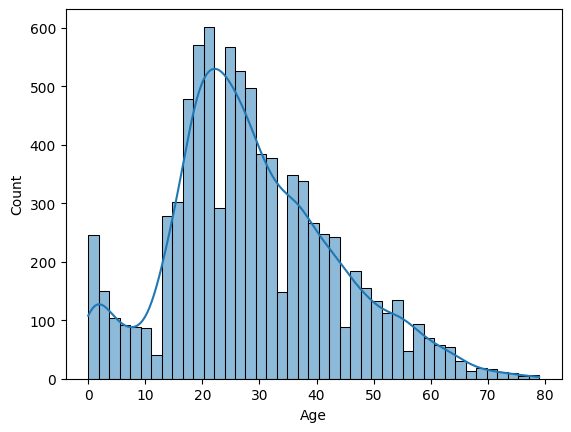

In [6]:
# Load data
train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/test.csv')

# Check column names
print(train_df.columns)
print(test_df.columns)

# Exploratory Data Analysis (EDA)
train_df.info()
train_df.describe()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

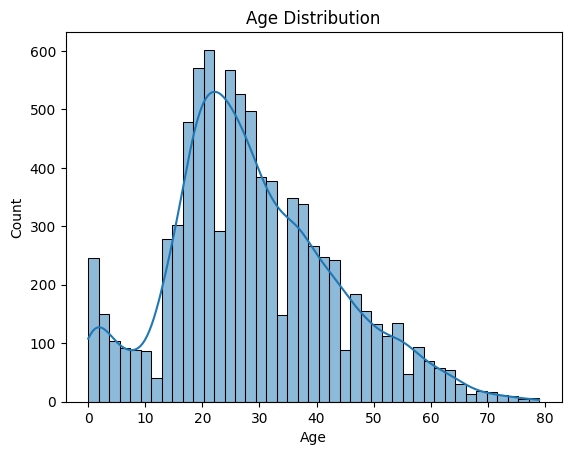

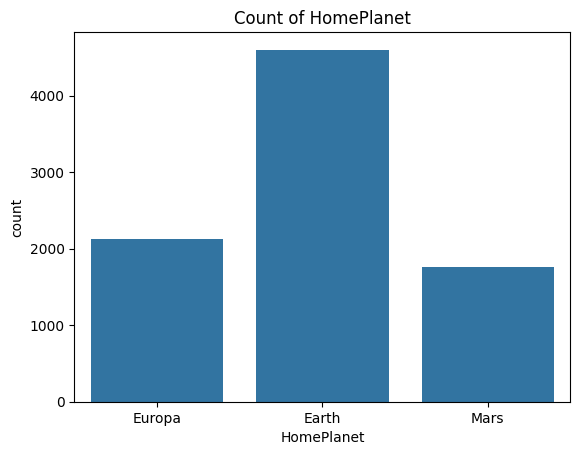

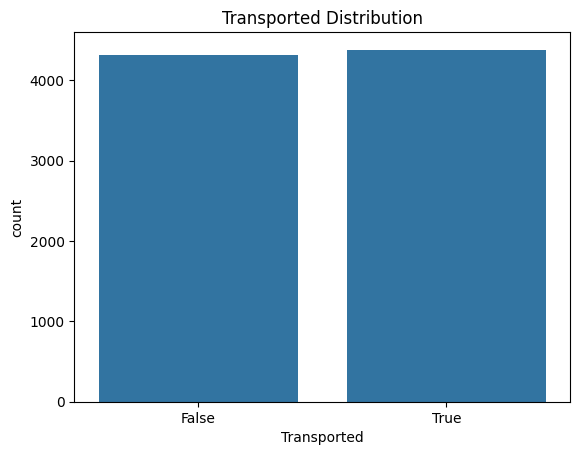

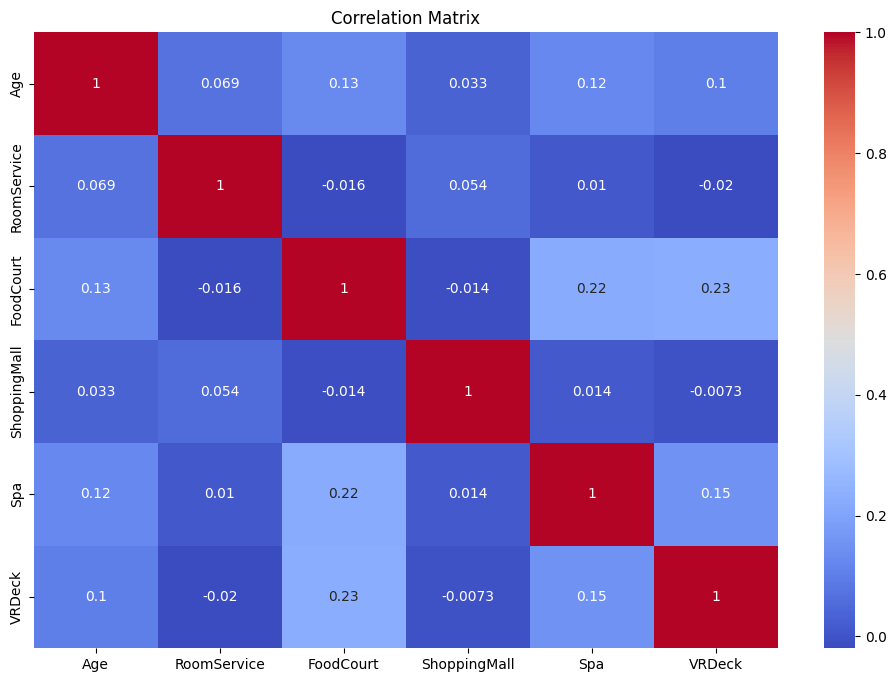

In [7]:
# Example visualizations
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('Count of HomePlanet')
plt.show()

sns.countplot(x='Transported', data=train_df)
plt.title('Transported Distribution')
plt.show()

# Only include numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()